In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [5]:
import statsmodels

In [6]:
ad = pd.read_csv("https://github.com/CharlotteZepeda/DP-Mini-Project/raw/380cff8680d5152a2d7e076ef1abd7f49c45073c/adni.csv")

### Data Checking

In [7]:
ad.shape

(1851, 50)

In [8]:
#check number of datapoints in each category 
ad.groupby("DIAGNOSIS").size()

DIAGNOSIS
CN          617
Dementia    348
MCI         886
dtype: int64

In [22]:
# Dropping the CN rows

index_names = ad[ ad['DIAGNOSIS'] == 'CN' ].index 
  
# drop these row indexes 
# from dataFrame 
adNoCN = ad.drop(index_names) 

In [23]:
# Checking the new data frame
adNoCN.groupby("DIAGNOSIS").size()

DIAGNOSIS
Dementia    348
MCI         886
dtype: int64

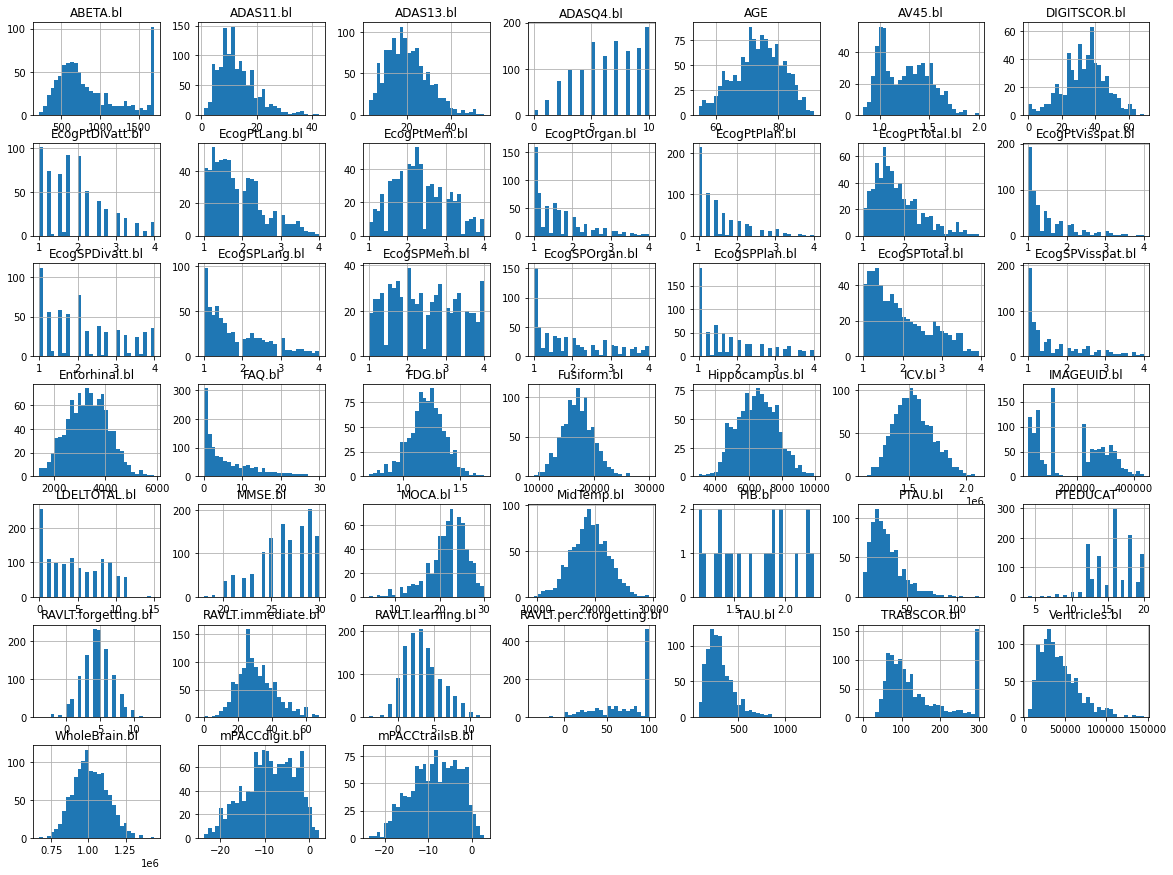

In [14]:
#check variable distributions
ad.hist(bins=30, figsize=(20,15))
plt.show()

The distributions of the data show that there are: <br> 1851 people with an uneven distribution of the outcome (CN:Dementia:MCI = 617:348:886). 


In [15]:
ad.describe()
ad

,DIAGNOSIS,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,ADAS11.bl,ADAS13.bl,ADASQ4.bl,...,EcogSPPlan.bl,EcogSPOrgan.bl,EcogSPDivatt.bl,EcogSPTotal.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PIB.bl,AV45.bl
1,Dementia,81.3,Male,18,Not Hisp/Latino,White,Married,22.00,31.00,8.0,...,NaN,NaN,NaN,NaN,741.5,239.7,22.83,1.090790,NaN,NaN
2,MCI,67.5,Male,10,Hisp/Latino,White,Married,14.33,21.33,6.0,...,NaN,NaN,NaN,NaN,1501.0,153.1,13.29,NaN,NaN,NaN
4,MCI,80.4,Female,13,Not Hisp/Latino,White,Married,18.67,25.67,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Dementia,75.4,Male,10,Hisp/Latino,More than one,Married,27.33,40.33,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Dementia,73.9,Female,12,Not Hisp/Latino,White,Married,12.33,24.33,10.0,...,NaN,NaN,NaN,NaN,357.4,329.9,31.26,1.118814,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,Dementia,69.1,Female,16,Not Hisp/Latino,White,Married,28.33,40.33,9.0,...,2.0,1.666667,1.50,2.315789,NaN,NaN,NaN,NaN,NaN,NaN
1839,MCI,82.9,Male,18,Not Hisp/Latino,White,Married,17.33,28.33,9.0,...,1.4,1.833333,2.00,1.810811,NaN,NaN,NaN,NaN,NaN,NaN
1841,MCI,66.8,Male,14,Not Hisp/Latino,White,Married,11.33,13.33,2.0,...,1.0,1.500000,1.50,1.394737,NaN,NaN,NaN,NaN,NaN,NaN
1845,MCI,79.8,Male,20,Not Hisp/Latino,White,Married,13.33,20.33,5.0,...,1.8,1.666667,2.75,2.052632,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 1 to 1848
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DIAGNOSIS                 1234 non-null   object 
 1   AGE                       1234 non-null   float64
 2   PTGENDER                  1234 non-null   object 
 3   PTEDUCAT                  1234 non-null   int64  
 4   PTETHCAT                  1234 non-null   object 
 5   PTRACCAT                  1234 non-null   object 
 6   PTMARRY                   1234 non-null   object 
 7   ADAS11.bl                 1231 non-null   float64
 8   ADAS13.bl                 1222 non-null   float64
 9   ADASQ4.bl                 1234 non-null   float64
 10  MMSE.bl                   1234 non-null   int64  
 11  RAVLT.immediate.bl        1230 non-null   float64
 12  RAVLT.learning.bl         1230 non-null   float64
 13  RAVLT.forgetting.bl       1230 non-null   float64
 14  RAVLT.pe

In [17]:
# Import label encoder 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'DIAGNOSIS'. 
ad["Diagnosis_Ordinal"]= label_encoder.fit_transform(ad["DIAGNOSIS"])
ad["PTGENDER_Ordinal"]= label_encoder.fit_transform(ad["PTGENDER"])
ad["PTMARRY_Ordinal"]= label_encoder.fit_transform(ad["PTMARRY"])
print(ad.head())

ad[["Diagnosis_Ordinal", "DIAGNOSIS", "PTGENDER_Ordinal", "PTGENDER", "PTMARRY_Ordinal", "PTMARRY"]].sample(20)
label_encoder.classes_


  DIAGNOSIS   AGE PTGENDER  PTEDUCAT         PTETHCAT       PTRACCAT  PTMARRY  \
1  Dementia  81.3     Male        18  Not Hisp/Latino          White  Married   
2       MCI  67.5     Male        10      Hisp/Latino          White  Married   
4       MCI  80.4   Female        13  Not Hisp/Latino          White  Married   
5  Dementia  75.4     Male        10      Hisp/Latino  More than one  Married   
7  Dementia  73.9   Female        12  Not Hisp/Latino          White  Married   

   ADAS11.bl  ADAS13.bl  ADASQ4.bl  ...  EcogSPTotal.bl  ABETA.bl  TAU.bl  \
1      22.00      31.00        8.0  ...             NaN     741.5   239.7   
2      14.33      21.33        6.0  ...             NaN    1501.0   153.1   
4      18.67      25.67        7.0  ...             NaN       NaN     NaN   
5      27.33      40.33       10.0  ...             NaN       NaN     NaN   
7      12.33      24.33       10.0  ...             NaN     357.4   329.9   

   PTAU.bl    FDG.bl  PIB.bl  AV45.bl  Diagnosis_O

array(['Divorced', 'Married', 'Never married', 'Unknown', 'Widowed'],
      dtype=object)

In [18]:
ad["PTMARRY"][:15]
list(label_encoder.classes_)
# I uncommented these lines of code transforming the 'Unknown' category in 'PTMARRY_Ordinal' to NaN because the model failes. 
#Since the category contains only 4 potential NaN values over 1851, I think we can safely neglect them.
#ad["PTMARRY_Ordinal"]=ad["PTMARRY_Ordinal"].replace(3, np.nan)
#ad["PTMARRY_Ordinal"].sample(100)


['Divorced', 'Married', 'Never married', 'Unknown', 'Widowed']

In [19]:
import scipy as sp
import scipy.stats as stats
count = ad.count()

ad_stats = pd.DataFrame(count, columns = ["Non-NaN"])

min_vals = ad.min()
ad_stats['Min'] = min_vals

max_vals = ad.max()
ad_stats['Max'] = max_vals

mean_vals = ad.mean(skipna = True)
ad_stats['Mean'] = mean_vals

median_vals = ad.median(skipna=True)
ad_stats['Median'] = median_vals

ad_mode_sci = stats.mode(ad, nan_policy='omit')
ad_stats['Mode'] = ad_mode_sci[0][0]


ad_stats

,Non-NaN,Min,Max,Mean,Median,Mode
DIAGNOSIS,1234,Dementia,MCI,NaN,NaN,MCI
AGE,1234,54.4,91.4,7.357553e+01,7.400000e+01,74.3
PTGENDER,1234,Female,Male,NaN,NaN,Male
PTEDUCAT,1234,4,20,1.569935e+01,1.600000e+01,16
PTETHCAT,1234,Hisp/Latino,Unknown,NaN,NaN,Not Hisp/Latino
PTRACCAT,1234,Am Indian/Alaskan,White,NaN,NaN,White
PTMARRY,1234,Divorced,Widowed,NaN,NaN,Married
ADAS11.bl,1231,1,42.67,1.295180e+01,1.167000e+01,6
ADAS13.bl,1222,3,54.67,2.032868e+01,1.900000e+01,18
ADASQ4.bl,1234,0,10,6.379254e+00,7.000000e+00,10


In [25]:
# I wrote a function to drop variables with >40% NaN 

#Calculating how many variables have <40% NaN
def dropNaNCols(ad):
    for column in ad:
        nan_count = ad[column].isna().sum()
        if nan_count >= (len(ad)*0.4):
            ad_df = ad_df.drop(column)
            print(column, nan_count)
    return ad_df
ad_df

,DIAGNOSIS,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,ADAS11.bl,ADAS13.bl,ADASQ4.bl,...,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,Diagnosis_Ordinal,PTGENDER_Ordinal,PTMARRY_Ordinal
1,Dementia,81.3,Male,18,Not Hisp/Latino,White,Married,22.00,31.00,8.0,...,15506.0,18422.0,1.920691e+06,741.5,239.7,22.83,1.090790,0,1,1
2,MCI,67.5,Male,10,Hisp/Latino,White,Married,14.33,21.33,6.0,...,19036.0,19615.0,1.679445e+06,1501.0,153.1,13.29,NaN,1,1,1
4,MCI,80.4,Female,13,Not Hisp/Latino,White,Married,18.67,25.67,7.0,...,17963.0,17802.0,1.485834e+06,NaN,NaN,NaN,NaN,1,0,1
5,Dementia,75.4,Male,10,Hisp/Latino,More than one,Married,27.33,40.33,10.0,...,12063.0,15374.0,1.353519e+06,NaN,NaN,NaN,NaN,0,1,1
7,Dementia,73.9,Female,12,Not Hisp/Latino,White,Married,12.33,24.33,10.0,...,16761.0,19741.0,1.471184e+06,357.4,329.9,31.26,1.118814,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,Dementia,69.1,Female,16,Not Hisp/Latino,White,Married,28.33,40.33,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1839,MCI,82.9,Male,18,Not Hisp/Latino,White,Married,17.33,28.33,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
1841,MCI,66.8,Male,14,Not Hisp/Latino,White,Married,11.33,13.33,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
1845,MCI,79.8,Male,20,Not Hisp/Latino,White,Married,13.33,20.33,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


In [26]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 1 to 1848
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DIAGNOSIS                 1234 non-null   object 
 1   AGE                       1234 non-null   float64
 2   PTGENDER                  1234 non-null   object 
 3   PTEDUCAT                  1234 non-null   int64  
 4   PTETHCAT                  1234 non-null   object 
 5   PTRACCAT                  1234 non-null   object 
 6   PTMARRY                   1234 non-null   object 
 7   ADAS11.bl                 1231 non-null   float64
 8   ADAS13.bl                 1222 non-null   float64
 9   ADASQ4.bl                 1234 non-null   float64
 10  MMSE.bl                   1234 non-null   int64  
 11  RAVLT.immediate.bl        1230 non-null   float64
 12  RAVLT.learning.bl         1230 non-null   float64
 13  RAVLT.forgetting.bl       1230 non-null   float64
 14  RAVLT.pe

In [21]:
# Dropping variables with not enough data to reliably imputate values - all variables with more than 40% data missing were removed (threshold 60% NaN) 
#ad_df = pd.DataFrame(ad)
#ad_df = ad_df.drop(columns=['EcogPtMem.bl', 'EcogPtMem.bl', 'EcogPtLang.bl', 'EcogPtVisspat.bl', 'EcogPtPlan.bl','EcogPtOrgan.bl', 'EcogPtDivatt.bl', 'EcogPtTotal.bl', 'EcogSPMem.bl',
#'EcogSPLang.bl','EcogSPVisspat.bl','EcogSPPlan.bl','EcogSPOrgan.bl','EcogSPDivatt.bl','EcogSPTotal.bl', 'MOCA.bl','PIB.bl','DIGITSCOR.bl', 'AV45.bl'])
#ad_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 1 to 1848
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DIAGNOSIS                 1234 non-null   object 
 1   AGE                       1234 non-null   float64
 2   PTGENDER                  1234 non-null   object 
 3   PTEDUCAT                  1234 non-null   int64  
 4   PTETHCAT                  1234 non-null   object 
 5   PTRACCAT                  1234 non-null   object 
 6   PTMARRY                   1234 non-null   object 
 7   ADAS11.bl                 1231 non-null   float64
 8   ADAS13.bl                 1222 non-null   float64
 9   ADASQ4.bl                 1234 non-null   float64
 10  MMSE.bl                   1234 non-null   int64  
 11  RAVLT.immediate.bl        1230 non-null   float64
 12  RAVLT.learning.bl         1230 non-null   float64
 13  RAVLT.forgetting.bl       1230 non-null   float64
 14  RAVLT.pe

In [15]:
#replaced the 'Unknown' category with NAN and counted NANs across all the variables.

#ad_df=ad_df.replace('Unknown', np.nan)
#ad_df.isna().sum()

DIAGNOSIS                     0
AGE                           0
PTGENDER                      0
PTEDUCAT                      0
PTETHCAT                      0
PTRACCAT                      0
PTMARRY                       0
ADAS11.bl                     5
ADAS13.bl                    15
ADASQ4.bl                     1
MMSE.bl                       0
RAVLT.immediate.bl            8
RAVLT.learning.bl             8
RAVLT.forgetting.bl           8
RAVLT.perc.forgetting.bl     14
LDELTOTAL.bl                  3
TRABSCOR.bl                  48
FAQ.bl                        6
mPACCdigit.bl                 1
mPACCtrailsB.bl               1
IMAGEUID.bl                 135
Ventricles.bl               201
Hippocampus.bl              366
WholeBrain.bl               167
Entorhinal.bl               390
Fusiform.bl                 390
MidTemp.bl                  390
ICV.bl                      135
ABETA.bl                    636
TAU.bl                      636
PTAU.bl                     636
FDG.bl  

In [16]:
# Wrote a simple for-loop to replace the function I wrote earlier duh
# I think these tables are a lot clearer

# Performing chi2 tests
from scipy.stats import chi2_contingency



cols = ['PTGENDER','PTETHCAT','PTRACCAT','PTMARRY']
for i in cols:
    ct = pd.crosstab(ad_df[i], ad_df['DIAGNOSIS'], margins=True)
    stat, pvalue, dof, expected = chi2_contingency(ct)
    print('\n', '\n', ct)
    print('Chi2 pvalue =', pvalue)
    





 
 DIAGNOSIS   CN  Dementia  MCI   All
PTGENDER                           
Female     334       157  362   853
Male       283       191  524   998
All        617       348  886  1851
Chi2 pvalue = 0.00022661757321130107

 
 DIAGNOSIS         CN  Dementia  MCI   All
PTETHCAT                                 
Hisp/Latino       21        11   29    61
Not Hisp/Latino  592       334  852  1778
Unknown            4         3    5    12
All              617       348  886  1851
Chi2 pvalue = 0.999990050847327

 
 DIAGNOSIS           CN  Dementia  MCI   All
PTRACCAT                                   
Am Indian/Alaskan    1         0    2     3
Asian               11         7   14    32
Black               35        14   30    79
Hawaiian/Other PI    0         0    2     2
More than one        8         4    7    19
Unknown              1         0    3     4
White              561       323  828  1712
All                617       348  886  1851
Chi2 pvalue = 0.9725529280070867

 
 DIAGNOSIS 

### Chi Squared Test Conclusions
Chi Squared Test Results indicate : <br><br>
(i) Significant association between Gender and Diagnosis Category **p value < .001** <br>
(ii) Non-Significant association between ethnicity and Diagnosis Category **p value > 0.05** <br>
(iii) Non-Significant association between Race and Diagnosis Category **p value > 0.05** <br>
(iv) Significant association between Marital Status and Diagnosis Category **p value < .001**

### ANOVA Tests On Numerical Variables 

Basic Assumption of ANOVA is that **each group is drawn from a normal population**, therefore data should be rescaled (cell 24 shows not all variables are normally distributed)

### Column Rescaling
1. Rescale all the columns <br>
2. Make a deep copy <br>
3. Drop categorical variables from the deep copy<br>
4. Compute individual ANOVAs for each variable 

In [17]:
# Rescale the columns of the dataframe
# for each value v in a distribution of values V:
#    v = (v-mean(V)) / std(V)

# Write a rescale() function


def rescale(ad_df):
    for col_name in ad_df.loc[:,:]:
        values = []
        mean_V = ad_df.loc[:,col_name].mean(skipna = True)
        std_V = ad_df.loc[:,col_name].std(skipna = True)
        for v in ad_df.loc[:, col_name]:
            v = (v - mean_V) / std_V
            values.append(v)
        ad_df[col_name] = values
    return ad_df

In [18]:
# Make a deep copy of the data, holding the rescaled values:
cad_df = ad_df.copy()

# we want to rescale all numeric columns, but not diagnosis which is categorical
# use the drop function exclude some columns (axis=1) or rows (axis=0) from the dataframe (all categorical variables)
cad_dfdropped = cad_df.drop(['DIAGNOSIS','PTGENDER','PTETHCAT','PTRACCAT','PTMARRY'], axis=1)
cad_dfdropped

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,Diagnosis_Ordinal,PTGENDER_Ordinal,PTMARRY_Ordinal
0,74.3,16,10.67,18.67,5.0,28,44.0,4.0,6.0,54.545455,...,16559.0,27936.0,1.984657e+06,NaN,NaN,NaN,1.369264,0,1,1
1,81.3,18,22.00,31.00,8.0,20,22.0,1.0,4.0,100.000000,...,15506.0,18422.0,1.920691e+06,741.5,239.7,22.83,1.090790,1,1,1
2,67.5,10,14.33,21.33,6.0,27,37.0,7.0,4.0,36.363636,...,19036.0,19615.0,1.679445e+06,1501.0,153.1,13.29,NaN,2,1,1
3,73.7,16,8.67,14.67,4.0,29,37.0,4.0,4.0,44.444444,...,24788.0,21614.0,1.640766e+06,547.3,337.0,33.43,1.297990,0,1,1
4,80.4,13,18.67,25.67,7.0,25,30.0,1.0,5.0,83.333333,...,17963.0,17802.0,1.485834e+06,NaN,NaN,NaN,NaN,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,71.4,14,12.00,15.00,2.0,29,38.0,4.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
1847,65.8,13,6.00,8.00,1.0,27,65.0,7.0,15.0,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1848,76.7,18,12.33,21.33,8.0,30,29.0,2.0,6.0,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1
1849,72.6,19,6.67,8.67,0.0,30,57.0,8.0,4.0,28.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1


Added non-rescaled columns to the rescaled dataset in one go.

In [19]:
# Now fill in cdf by applying the rescale function to each column except Diagnosis column
# then readd the categorical diagnosis column to cad_df dataset

cad_df= rescale(cad_dfdropped)
non_rescaled_cat_cols = [ad_df['DIAGNOSIS'],ad_df['PTGENDER'],ad_df['PTETHCAT'],ad_df['PTRACCAT'],ad_df['PTMARRY']]
cad_df=cad_df.join(non_rescaled_cat_cols)
cad_df




,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,PTAU.bl,FDG.bl,Diagnosis_Ordinal,PTGENDER_Ordinal,PTMARRY_Ordinal,DIAGNOSIS,PTGENDER,PTETHCAT,PTRACCAT,PTMARRY
0,0.096682,0.018529,-0.018681,0.197331,-0.062597,0.270538,0.650844,-0.099737,0.679843,-0.082046,...,NaN,0.877787,-1.287534,0.924255,-0.291731,CN,Male,Not Hisp/Latino,White,Married
1,1.068984,0.725686,1.713998,1.504350,0.956214,-2.730306,-1.089520,-1.178889,-0.119998,1.232468,...,-0.329458,-0.927373,-0.163371,0.924255,-0.291731,Dementia,Male,Not Hisp/Latino,White,Married
2,-0.847839,-2.102941,0.541037,0.479299,0.277007,-0.104568,0.097092,0.979415,-0.119998,-0.607851,...,-0.982737,NaN,0.960792,0.924255,-0.291731,MCI,Male,Hisp/Latino,White,Married
3,0.013342,0.018529,-0.324538,-0.226682,-0.402201,0.645644,0.097092,-0.099737,-0.119998,-0.374160,...,0.396408,0.415766,-1.287534,0.924255,-0.291731,CN,Male,Not Hisp/Latino,White,Married
4,0.943974,-1.042206,1.204747,0.939353,0.616610,-0.854779,-0.456660,-1.178889,0.279923,0.750479,...,NaN,NaN,0.960792,-1.081368,-0.291731,MCI,Female,Not Hisp/Latino,White,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,-0.306128,-0.688628,0.184714,-0.191701,-1.081409,0.645644,0.176200,-0.099737,-1.719680,-1.659461,...,NaN,NaN,-1.287534,0.924255,-0.291731,CN,Male,Hisp/Latino,White,Married
1847,-1.083969,-1.042206,-0.732857,-0.933724,-1.421013,-0.104568,2.312101,0.979415,4.279129,1.232468,...,NaN,NaN,-1.287534,-1.081368,-0.291731,CN,Female,Not Hisp/Latino,White,Married
1848,0.430043,0.725686,0.235180,0.479299,0.956214,1.020749,-0.535767,-0.819172,0.679843,1.232468,...,NaN,NaN,0.960792,0.924255,-0.291731,MCI,Male,Not Hisp/Latino,White,Married
1849,-0.139448,1.079264,-0.630395,-0.862702,-1.760617,1.020749,1.679241,1.339132,-0.119998,-0.833196,...,NaN,NaN,-1.287534,0.924255,-0.291731,CN,Male,Not Hisp/Latino,White,Married


### Final Rescale Table Below
(others can be deleted as this one contains all values) 

In [20]:
#ANOVAS
#are they computed on ad_df values or cad_df values?
#(i) Age 

from scipy.stats import f_oneway

a1=cad_df[cad_df.DIAGNOSIS=='CN'].AGE
a2=cad_df[cad_df.DIAGNOSIS=='Dementia'].AGE
a3=cad_df[cad_df.DIAGNOSIS=='MCI'].AGE

a1 = a1[np.logical_not(np.isnan(a1))]
a2 = a2[np.logical_not(np.isnan(a2))]
a3 = a3[np.logical_not(np.isnan(a3))]

print(f_oneway(a1, a2, a3))

F_onewayResult(statistic=8.83665219059515, pvalue=0.00015153936740062868)


In [21]:
#Loop for computing ANOVAS for numerical variables

cols = ['AGE','PTEDUCAT','ADAS11.bl','ADAS13.bl','ADASQ4.bl','MMSE.bl','RAVLT.immediate.bl','RAVLT.learning.bl','RAVLT.perc.forgetting.bl','LDELTOTAL.bl','TRABSCOR.bl','FAQ.bl','mPACCdigit.bl','mPACCtrailsB.bl','IMAGEUID.bl','Ventricles.bl','Hippocampus.bl','WholeBrain.bl','Entorhinal.bl','Fusiform.bl','MidTemp.bl','ICV.bl','ABETA.bl','TAU.bl','PTAU.bl','FDG.bl']
for i in cols:
    a1=cad_df[i][cad_df.DIAGNOSIS=='CN']
    a2=cad_df[i][cad_df.DIAGNOSIS=='Dementia']
    a3=cad_df[i][cad_df.DIAGNOSIS=='MCI']

    a1 = a1[np.logical_not(np.isnan(a1))]
    a2 = a2[np.logical_not(np.isnan(a2))]
    a3 = a3[np.logical_not(np.isnan(a3))]
    print(i) 
    print('Anova Test Result = ', f_oneway(a1, a2, a3))
    print('\n')



AGE
Anova Test Result =  F_onewayResult(statistic=8.83665219059515, pvalue=0.00015153936740062868)


PTEDUCAT
Anova Test Result =  F_onewayResult(statistic=23.121485599146336, pvalue=1.2079389667889303e-10)


ADAS11.bl
Anova Test Result =  F_onewayResult(statistic=904.2155333509479, pvalue=2.354203440239909e-274)


ADAS13.bl
Anova Test Result =  F_onewayResult(statistic=1105.6212640709487, pvalue=1.052235277e-315)


ADASQ4.bl
Anova Test Result =  F_onewayResult(statistic=851.1805776742857, pvalue=1.0434595266198145e-262)


MMSE.bl
Anova Test Result =  F_onewayResult(statistic=1435.8484994640044, pvalue=0.0)


RAVLT.immediate.bl
Anova Test Result =  F_onewayResult(statistic=590.3242404968256, pvalue=8.714124602234297e-199)


RAVLT.learning.bl
Anova Test Result =  F_onewayResult(statistic=329.85656732971677, pvalue=3.744887242592438e-123)


RAVLT.perc.forgetting.bl
Anova Test Result =  F_onewayResult(statistic=388.28189923981097, pvalue=2.465037022140986e-141)


LDELTOTAL.bl
Anova Test R

In [22]:
#make a table of the results 

#import plotly.graph_objects as go

#fig = go.Figure(data=[go.Table(header=dict(values=['Variable', 'ANOVA Result']),
                 #cells=dict(values=[['Age', 'PTEDUCAT', 'ADAS11.bl', 'ADAS13.bl' , 'ADASQ4.bl' , 'MMSE.bl', 'RAVLT.immediate.bl', 'RAVLT.learning.bl' , 'RAVLT.perc.forgetting.bl' , 'LDELTOTAL.bl' , 'TRABSCOR.bl' , 'FAQ.bl', 'mPACCdigit.bl', 'mPACCtrailsB.bl', 'IMAGEUID.bl', 'Ventricles.bl', 'Hippocampus.bl', 'WholeBrain.bl', 'Entorhinal.bl', 'Fusiform.bl', 'MidTemp.bl', 'ICV.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl', 'FDG.bl'], [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,]])
#fig.show()

## ANOVA Test Conclusions


### Data Stratification 

In [23]:
from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(ad_df, test_size=0.25, random_state=0, stratify=ad_df['Diagnosis_Ordinal']) 

# separate the 'DIAGNOSIS' column from training/testing data
train_X = train[train.columns[np.r_[1:3,6:len(ad_df.keys())-3, -2, -1]]]
test_X = test[test.columns[np.r_[1:3,6:len(ad_df.keys())-3,-2, -1]]]
train_Y = train['Diagnosis_Ordinal']
test_Y = test['Diagnosis_Ordinal']

In [24]:
# Checking the names of the keys
ad_df.keys()


Index(['DIAGNOSIS', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT',
       'PTMARRY', 'ADAS11.bl', 'ADAS13.bl', 'ADASQ4.bl', 'MMSE.bl',
       'RAVLT.immediate.bl', 'RAVLT.learning.bl', 'RAVLT.forgetting.bl',
       'RAVLT.perc.forgetting.bl', 'LDELTOTAL.bl', 'TRABSCOR.bl', 'FAQ.bl',
       'mPACCdigit.bl', 'mPACCtrailsB.bl', 'IMAGEUID.bl', 'Ventricles.bl',
       'Hippocampus.bl', 'WholeBrain.bl', 'Entorhinal.bl', 'Fusiform.bl',
       'MidTemp.bl', 'ICV.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl', 'FDG.bl',
       'Diagnosis_Ordinal', 'PTGENDER_Ordinal', 'PTMARRY_Ordinal'],
      dtype='object')

In [25]:
# Checking if the test segment is correct
print(test_X)

       AGE PTGENDER  PTMARRY  ADAS11.bl  ADAS13.bl  ADASQ4.bl  MMSE.bl  \
1435  71.9     Male  Married       8.00      14.00        4.0       28   
719   76.4   Female  Widowed      10.00      15.00        5.0       28   
522   80.0   Female  Married       6.67      10.67        4.0       30   
1198  74.4     Male  Married       7.00      13.00        6.0       26   
1038  84.3     Male  Married       6.00       8.00        2.0       30   
...    ...      ...      ...        ...        ...        ...      ...   
539   73.5     Male  Married      11.33      14.33        3.0       26   
1346  67.8     Male  Married       9.00      16.00        7.0       27   
188   70.6   Female  Widowed       9.67      18.67        9.0       28   
96    74.1     Male  Married       6.67       8.67        2.0       30   
1777  75.4     Male  Married      12.00      15.00        3.0       30   

      RAVLT.immediate.bl  RAVLT.learning.bl  RAVLT.forgetting.bl  ...  \
1435                28.0              

In [26]:
#checking train section
print(train_X)

       AGE PTGENDER   PTMARRY  ADAS11.bl  ADAS13.bl  ADASQ4.bl  MMSE.bl  \
337   65.4   Female   Married       3.00       6.00        3.0       29   
1670  59.3   Female   Married      37.00      49.00        7.0       20   
1790  75.4   Female   Married      11.33      15.33        3.0       30   
433   67.7   Female   Married      17.67      25.67        8.0       23   
196   75.8     Male   Married       3.33       5.33        2.0       30   
...    ...      ...       ...        ...        ...        ...      ...   
1070  70.5     Male   Married       7.00      12.00        5.0       28   
1279  68.0   Female   Married       5.00       8.00        2.0       28   
663   81.2   Female  Divorced       9.00      11.00        1.0       29   
300   74.1     Male   Married       3.67       6.67        2.0       29   
1090  69.9     Male   Married       6.00      11.00        4.0       28   

      RAVLT.immediate.bl  RAVLT.learning.bl  RAVLT.forgetting.bl  ...  \
337                 55.0  

### Data Imputation


In [27]:
# remove categorical variables for data imputation

train_X=pd.DataFrame(train_X)
type(train_X)

pandas.core.frame.DataFrame

In [28]:
train_X.describe()



,AGE,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,LDELTOTAL.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
count,1388.000000,1383.000000,1375.000000,1387.000000,1388.000000,1382.000000,1382.000000,1382.000000,1377.000000,1385.000000,...,1097.000000,1097.000000,1097.000000,1.287000e+03,913.000000,913.000000,913.000000,967.000000,1388.000000,1388.000000
mean,73.772767,10.807187,16.829331,5.190339,27.272334,35.633864,4.264834,4.329957,57.958293,7.361733,...,3494.212397,17312.628988,19441.747493,1.533102e+06,967.392881,290.144699,28.010405,1.230963,0.536744,1.319885
std,7.257089,6.519850,9.402803,2.962945,2.694631,12.713598,2.790678,2.523681,34.603240,5.418856,...,783.373321,2757.837981,3111.573332,1.663500e+05,455.666148,136.715549,14.989534,0.153637,0.498828,1.064594
min,54.400000,0.000000,0.000000,0.000000,18.000000,0.000000,-8.000000,-9.000000,-100.000000,0.000000,...,1443.000000,9610.000000,9375.000000,1.100687e+06,199.000000,79.000000,7.000000,0.697264,0.000000,0.000000
25%,69.100000,6.000000,9.670000,3.000000,26.000000,26.000000,2.000000,3.000000,28.571429,3.000000,...,2946.000000,15459.000000,17373.000000,1.409638e+06,588.000000,193.000000,17.420000,1.137580,0.000000,1.000000
50%,73.900000,9.330000,15.000000,5.000000,28.000000,34.000000,4.000000,4.000000,60.000000,8.000000,...,3510.000000,17311.000000,19343.000000,1.520641e+06,840.800000,261.000000,24.490000,1.245124,1.000000,1.000000
75%,79.025000,14.000000,22.330000,8.000000,29.000000,44.000000,6.000000,6.000000,100.000000,11.000000,...,4061.000000,19055.000000,21573.000000,1.644290e+06,1373.000000,353.400000,34.390000,1.329977,1.000000,1.000000
max,91.400000,40.000000,51.000000,10.000000,30.000000,71.000000,12.000000,15.000000,100.000000,23.000000,...,5896.000000,29950.000000,32189.000000,2.110294e+06,1701.000000,1301.000000,121.000000,1.707168,1.000000,4.000000


In [29]:
train_X.mean()

AGE                         7.377277e+01
ADAS11.bl                   1.080719e+01
ADAS13.bl                   1.682933e+01
ADASQ4.bl                   5.190339e+00
MMSE.bl                     2.727233e+01
RAVLT.immediate.bl          3.563386e+01
RAVLT.learning.bl           4.264834e+00
RAVLT.forgetting.bl         4.329957e+00
RAVLT.perc.forgetting.bl    5.795829e+01
LDELTOTAL.bl                7.361733e+00
TRABSCOR.bl                 1.200103e+02
FAQ.bl                      4.009393e+00
mPACCdigit.bl              -5.943134e+00
mPACCtrailsB.bl            -5.650451e+00
IMAGEUID.bl                 1.919259e+05
Ventricles.bl               3.998438e+04
Hippocampus.bl              6.753165e+03
WholeBrain.bl               1.021351e+06
Entorhinal.bl               3.494212e+03
Fusiform.bl                 1.731263e+04
MidTemp.bl                  1.944175e+04
ICV.bl                      1.533102e+06
ABETA.bl                    9.673929e+02
TAU.bl                      2.901447e+02
PTAU.bl         

In [30]:
train_X

,AGE,PTGENDER,PTMARRY,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
337,65.4,Female,Married,3.00,6.00,3.0,29,55.0,8.0,3.0,...,4465.0,17729.0,23542.0,1.555460e+06,1429.0,230.9,19.43,NaN,0,1
1670,59.3,Female,Married,37.00,49.00,7.0,20,24.0,0.0,6.0,...,2523.0,13421.0,11193.0,1.287538e+06,578.0,440.2,39.92,0.833628,0,1
1790,75.4,Female,Married,11.33,15.33,3.0,30,33.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
433,67.7,Female,Married,17.67,25.67,8.0,23,40.0,3.0,1.0,...,2105.0,15468.0,20646.0,1.611851e+06,392.1,321.4,34.11,1.176030,0,1
196,75.8,Male,Married,3.33,5.33,2.0,30,40.0,10.0,6.0,...,4464.0,17671.0,22773.0,1.817905e+06,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,70.5,Male,Married,7.00,12.00,5.0,28,30.0,4.0,5.0,...,4384.0,19570.0,21535.0,1.699188e+06,1670.0,239.5,20.73,1.398414,1,1
1279,68.0,Female,Married,5.00,8.00,2.0,28,46.0,6.0,6.0,...,NaN,NaN,NaN,1.403438e+06,1701.0,316.0,26.64,1.352060,0,1
663,81.2,Female,Divorced,9.00,11.00,1.0,29,49.0,6.0,3.0,...,NaN,NaN,NaN,1.336108e+06,915.0,211.1,19.88,NaN,0,0
300,74.1,Male,Married,3.67,6.67,2.0,29,45.0,4.0,4.0,...,3851.0,18662.0,22669.0,1.552564e+06,1263.0,192.9,15.07,NaN,1,1


In [31]:
from sklearn.impute import SimpleImputer
train_X_numeric = train_X.drop(['PTGENDER', 'PTMARRY','PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
test_X_numeric = test_X.drop(['PTGENDER', 'PTMARRY','PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_X_numeric)
#here are the means per columns that are used for imputation
print('means per columns for imputation', imputer.statistics_)
# now perform the imputation on trainng set
train_X_numeric_tr=imputer.transform(train_X_numeric)

# and imputation on test set
test_X_numeric_tr=imputer.transform(test_X_numeric)
type(train_X_numeric)
train_X_numeric_tr=pd.DataFrame(train_X_numeric_tr, columns=train_X_numeric.columns, index = train_X_numeric.index)
test_X_numeric_tr=pd.DataFrame(test_X_numeric_tr, columns=test_X_numeric.columns, index = test_X_numeric.index)

print('notice mean values appearing in the train set', train_X_numeric_tr)

means per columns for imputation [ 7.37727666e+01  1.08071873e+01  1.68293309e+01  5.19033886e+00
  2.72723343e+01  3.56338640e+01  4.26483357e+00  4.32995658e+00
  5.79582932e+01  7.36173285e+00  1.20010347e+02  4.00939306e+00
 -5.94313430e+00 -5.65045137e+00  1.91925943e+05  3.99843786e+04
  6.75316517e+03  1.02135107e+06  3.49421240e+03  1.73126290e+04
  1.94417475e+04  1.53310220e+06  9.67392881e+02  2.90144699e+02
  2.80104053e+01  1.23096300e+00]
notice mean values appearing in the train set        AGE  ADAS11.bl  ADAS13.bl  ADASQ4.bl  MMSE.bl  RAVLT.immediate.bl  \
337   65.4       3.00       6.00        3.0     29.0                55.0   
1670  59.3      37.00      49.00        7.0     20.0                24.0   
1790  75.4      11.33      15.33        3.0     30.0                33.0   
433   67.7      17.67      25.67        8.0     23.0                40.0   
196   75.8       3.33       5.33        2.0     30.0                40.0   
...    ...        ...        ...        .

In [32]:
train_X_numeric_tr

,AGE,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,LDELTOTAL.bl,...,Hippocampus.bl,WholeBrain.bl,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl
337,65.4,3.00,6.00,3.0,29.0,55.0,8.0,3.0,21.428571,8.0,...,7360.000000,1.107578e+06,4465.000000,17729.000000,23542.000000,1.555460e+06,1429.000000,230.900000,19.430000,1.230963
1670,59.3,37.00,49.00,7.0,20.0,24.0,0.0,6.0,100.000000,3.0,...,6384.000000,8.225472e+05,2523.000000,13421.000000,11193.000000,1.287538e+06,578.000000,440.200000,39.920000,0.833628
1790,75.4,11.33,15.33,3.0,30.0,33.0,3.0,3.0,42.857143,9.0,...,6753.165171,1.021351e+06,3494.212397,17312.628988,19441.747493,1.533102e+06,967.392881,290.144699,28.010405,1.230963
433,67.7,17.67,25.67,8.0,23.0,40.0,3.0,1.0,10.000000,4.0,...,6154.000000,1.071954e+06,2105.000000,15468.000000,20646.000000,1.611851e+06,392.100000,321.400000,34.110000,1.176030
196,75.8,3.33,5.33,2.0,30.0,40.0,10.0,6.0,42.857143,13.0,...,7506.000000,1.060965e+06,4464.000000,17671.000000,22773.000000,1.817905e+06,967.392881,290.144699,28.010405,1.230963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,70.5,7.00,12.00,5.0,28.0,30.0,4.0,5.0,62.500000,9.0,...,6753.165171,1.146275e+06,4384.000000,19570.000000,21535.000000,1.699188e+06,1670.000000,239.500000,20.730000,1.398414
1279,68.0,5.00,8.00,2.0,28.0,46.0,6.0,6.0,50.000000,10.0,...,6981.000000,9.766458e+05,3494.212397,17312.628988,19441.747493,1.403438e+06,1701.000000,316.000000,26.640000,1.352060
663,81.2,9.00,11.00,1.0,29.0,49.0,6.0,3.0,25.000000,5.0,...,6753.165171,9.133150e+05,3494.212397,17312.628988,19441.747493,1.336108e+06,915.000000,211.100000,19.880000,1.230963
300,74.1,3.67,6.67,2.0,29.0,45.0,4.0,4.0,36.363636,16.0,...,7749.000000,1.023405e+06,3851.000000,18662.000000,22669.000000,1.552564e+06,1263.000000,192.900000,15.070000,1.230963


In [33]:
# Joining categocial variables with the imputed dataframe.

train_X_cat_cols = [train_X['PTGENDER_Ordinal'],train_X['PTMARRY_Ordinal']]
test_X_cat_cols = [test_X['PTGENDER_Ordinal'],test_X['PTMARRY_Ordinal']]
train_X=train_X_numeric_tr.join(train_X_cat_cols)
test_X=test_X_numeric_tr.join(test_X_cat_cols)
train_X



,AGE,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,LDELTOTAL.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
337,65.4,3.00,6.00,3.0,29.0,55.0,8.0,3.0,21.428571,8.0,...,4465.000000,17729.000000,23542.000000,1.555460e+06,1429.000000,230.900000,19.430000,1.230963,0,1
1670,59.3,37.00,49.00,7.0,20.0,24.0,0.0,6.0,100.000000,3.0,...,2523.000000,13421.000000,11193.000000,1.287538e+06,578.000000,440.200000,39.920000,0.833628,0,1
1790,75.4,11.33,15.33,3.0,30.0,33.0,3.0,3.0,42.857143,9.0,...,3494.212397,17312.628988,19441.747493,1.533102e+06,967.392881,290.144699,28.010405,1.230963,0,1
433,67.7,17.67,25.67,8.0,23.0,40.0,3.0,1.0,10.000000,4.0,...,2105.000000,15468.000000,20646.000000,1.611851e+06,392.100000,321.400000,34.110000,1.176030,0,1
196,75.8,3.33,5.33,2.0,30.0,40.0,10.0,6.0,42.857143,13.0,...,4464.000000,17671.000000,22773.000000,1.817905e+06,967.392881,290.144699,28.010405,1.230963,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,70.5,7.00,12.00,5.0,28.0,30.0,4.0,5.0,62.500000,9.0,...,4384.000000,19570.000000,21535.000000,1.699188e+06,1670.000000,239.500000,20.730000,1.398414,1,1
1279,68.0,5.00,8.00,2.0,28.0,46.0,6.0,6.0,50.000000,10.0,...,3494.212397,17312.628988,19441.747493,1.403438e+06,1701.000000,316.000000,26.640000,1.352060,0,1
663,81.2,9.00,11.00,1.0,29.0,49.0,6.0,3.0,25.000000,5.0,...,3494.212397,17312.628988,19441.747493,1.336108e+06,915.000000,211.100000,19.880000,1.230963,0,0
300,74.1,3.67,6.67,2.0,29.0,45.0,4.0,4.0,36.363636,16.0,...,3851.000000,18662.000000,22669.000000,1.552564e+06,1263.000000,192.900000,15.070000,1.230963,1,1


# Building and evaluation predictive models on training set, and testing on test set

### We'll use cross validation to look also for good values for the model's hyperparameters. We use 5 cross validation.


In [59]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier()
scores=cross_val_score(dt, train_X.to_numpy(), train_Y.to_numpy(), scoring='accuracy', cv=10)
print('Acuracy on the 10 folds', scores)
print('and their mean', np.mean(scores))

Acuracy on the 10 folds [0.79136691 0.85611511 0.83453237 0.84892086 0.81294964 0.84892086
 0.8705036  0.79856115 0.81884058 0.86956522]
and their mean 0.8350276300698571


In [65]:
# in the previous construction of the decision tree, the hyperparameters (such as depth, split criterion, etc) were default values
# lets try other values, for instance 3 levels:
dt.max_depth=6
scores=cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=10)
print('acuracy on the 10 folds of CV', scores)
print('and their mean', np.mean(scores)) # we see performance improved

acuracy on the 10 folds of CV [0.89208633 0.85611511 0.84172662 0.8705036  0.87769784 0.94244604
 0.92086331 0.85611511 0.86956522 0.9057971 ]
and their mean 0.8832916275675112


In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]} ]

grid_search = GridSearchCV(dt, param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

best parameter values {'max_depth': 6}
best estimator DecisionTreeClassifier(max_depth=6)


In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.8105150662079031 {'max_depth': 2}
0.8097956417474714 {'max_depth': 3}
0.8580700656865812 {'max_depth': 4}
0.872484620998853 {'max_depth': 5}
0.8818527786466479 {'max_depth': 6}
0.873933896361172 {'max_depth': 7}
0.8552080075070378 {'max_depth': 8}
0.858075278907309 {'max_depth': 9}
0.8508862475237203 {'max_depth': 10}
0.8429777916796997 {'max_depth': 11}
0.8479720571368992 {'max_depth': 12}


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

best_dt=grid_search.best_estimator_
pred_Y=best_dt.predict(test_X)

print('confusion matrix \n', confusion_matrix(test_Y, pred_Y))
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y, average=None))
print('\n recall', recall_score(test_Y, pred_Y, average=None))
print('\n f1', f1_score(test_Y, pred_Y, average=None))

confusion matrix 
 [[129   0  25]
 [  0  61  26]
 [  8   5 209]]

 accuracy 0.8617710583153347

 precision [0.94160584 0.92424242 0.80384615]

 recall [0.83766234 0.70114943 0.94144144]

 f1 [0.88659794 0.79738562 0.86721992]


In [98]:
#Comparison of different bagging ensemble methods

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score


DTree_clf = DecisionTreeClassifier()
DTree_clf.fit(train_X, train_Y)
DTree_pred = DTree_clf.predict(test_X)

dtree_bagging_model = BaggingClassifier(base_estimator=DTree_clf, n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
random_forest = RandomForestClassifier(n_estimators=500, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=500, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
    results = cross_val_score(model, train_X, train_Y, cv=k_folds)
    print(results.mean())

#bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.8832919254658383
0.8724223602484471
0.8601449275362318


In [87]:
#Voting classifier 
from sklearn.metrics import accuracy_score
for clf in (rnd_clf, voting_clf):
    clf.fit(train_X, train_Y)
    y_pred = clf.predict(test_X)
    print(clf.__class__.__name__, accuracy_score(test_Y, y_pred))


RandomForestClassifier 0.8790496760259179
VotingClassifier 0.8833693304535637


In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(train_X, train_Y)
y_pred = bag_clf.predict(test_X)

In [83]:
bag_clf = BaggingClassifier(
... DecisionTreeClassifier(), n_estimators=500,
... bootstrap=True, n_jobs=-1, oob_score=True)
...
>>> bag_clf.fit(train_X, train_Y)
>>> bag_clf.oob_score_


0.8825648414985591

In [ ]:
# AdaBoost

k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

num_estimators = [100, 200, 500]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=i, algorithm="SAMME.R", learning_rate=0.5)
    results = cross_val_score(ada_boost, train_X, train_Y, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 100 estimators:
0.800383022774327
Results for 200 estimators:
0.7945652173913044
